In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

#dataset = pd.read_pickle('/content/drive/MyDrive/final_dataset.pkl')
dataset = pd.read_pickle('/content/drive/MyDrive/final_dataset_splits.pkl')
print(dataset.columns.values)
dataset.head(10)

['acousticness' 'artist_popularity' 'danceability' 'duration_ms' 'energy'
 'followers' 'instrumentalness' 'key' 'liveness' 'loudness' 'lyrics'
 'mode' 'name' 'peak_pos' 'speechiness' 'tempo' 'time_signature' 'uri'
 'valence' 'weeks' 'hit' 'popularity' 'year' 'train']


,acousticness,artist_popularity,danceability,duration_ms,energy,followers,instrumentalness,key,liveness,loudness,...,speechiness,tempo,time_signature,uri,valence,weeks,hit,popularity,year,train
0,0.823,12,0.743,226520.0,0.35,2,0.0,2,0.0636,-7.202,...,0.046,138.7,4,spotify:track:6BoQdPEcadx6n6BBdqCS7k,0.707,0,False,0.000000,2000,True
1,0.242,61,0.668,226333,0.698,1524940,6.32E-05,11,0.06,-7.036,...,0.0714,106.041,4,spotify:track:0kyvUS4lUq0UBhVTnJNkgo,0.448,5,True,8.999205,2000,True
2,0.235,60,0.838,286467,0.405,1169035,0,1,0.383,-9.684,...,0.644,92.115,4,spotify:track:4EQ0dK6Sg7v685NGrQvuki,0.843,5,True,12.535974,2000,True
3,0.307,58,0.528,182440,0.692,1054955,4.91E-05,1,0.141,-6.339,...,0.0327,82.788,4,spotify:track:7fkGuyDiJoqHbMiPqjqNKx,0.635,5,True,11.145990,2000,True
4,0.014,47,0.758,238307,0.482,1134399,0,8,0.0477,-5.372,...,0.0287,120.105,4,spotify:track:7KNu81Nxp1EZyvZvkGBH4d,0.301,6,True,8.195294,2000,True
5,0.000891,51,0.481,189333,0.94,93295,0,7,0.0939,-5.204,...,0.066,96.493,4,spotify:track:3mNecsYFb6LQg7822DPXCP,0.66,27,True,54.354957,2000,True
6,0.252,49,0.586,271893,0.527,1222874,0,8,0.119,-7.17,...,0.0306,115.989,4,spotify:track:5u5YZpr7Ccrgw2RnYNzwjl,0.0717,6,True,15.653198,2000,True
7,0.0362,75,0.241,321293,0.508,8209470,0.599,9,0.167,-9.791,...,0.0275,140.627,4,spotify:track:1pNSYQkmeFSqsSOGwwxs5L,0.0445,6,True,18.244131,2000,True
8,0.0117,66,0.665,413880,0.991,1123602,0.00392,7,0.339,-6.725,...,0.256,152.596,4,spotify:track:7mCQK9YB25WZw1saUjfL4e,0.0676,27,True,27.350299,2000,True
9,0.324,51,0.822,188973.0,0.355,18698,0.014,3,0.102,-12.444,...,0.0564,138.068,4,spotify:track:4VTf5dPyBntcYFwW9b3fto,0.873,0,False,0.000000,2000,True


In [ ]:
simplified_dataset = (dataset[['acousticness', 'artist_popularity', 'danceability', 'duration_ms', 'followers', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
 'speechiness', 'tempo', 'time_signature','valence', 'hit', 'popularity', 'train']])
print(simplified_dataset)

      acousticness  artist_popularity danceability duration_ms  followers  \
0            0.823                 12        0.743    226520.0          2   
1            0.242                 61        0.668      226333    1524940   
2            0.235                 60        0.838      286467    1169035   
3            0.307                 58        0.528      182440    1054955   
4            0.014                 47        0.758      238307    1134399   
...            ...                ...          ...         ...        ...   
10877        0.014                 78        0.639      253200    5673218   
10878        0.435                 87        0.713      201667   20174199   
10879       0.0241                 78        0.536      236987   24970789   
10880        0.831                 84        0.566    205373.0   14629560   
10881      0.00129                 84        0.548    248773.0    8205485   

      energy instrumentalness  key liveness loudness speechiness    tempo  

In [ ]:
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


train = simplified_dataset[simplified_dataset.train].drop(['train'], axis=1)
test = simplified_dataset[~simplified_dataset.train].drop(['train'], axis=1)

print(train)


X = train.iloc[:,0:14]
y_bin = train.iloc[:,14:15]
y_pop = train.iloc[:,15:16]

X_test_num = test.iloc[:,0:14]
y_test_bin = test.iloc[:,14:15]
y_test_pop = test.iloc[:,15:16]

y_bin = np.asarray(y_bin)
y_pop = np.asarray(y_pop)
X = np.asarray(X)

y_test_bin = np.asarray(y_test_bin)
y_test_pop = np.asarray(y_test_pop)
X = np.asarray(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

test_scaler = StandardScaler()
X_test_num = scaler.fit_transform(X_test_num)


min_max_scaler = preprocessing.MinMaxScaler()
y_pop = min_max_scaler.fit_transform(y_pop)
print(y_pop)

test_min_max_scaler = preprocessing.MinMaxScaler()
y_test_pop = test_min_max_scaler.fit_transform(y_test_pop)



     acousticness  artist_popularity danceability duration_ms  followers  \
0           0.823                 12        0.743    226520.0          2   
1           0.242                 61        0.668      226333    1524940   
2           0.235                 60        0.838      286467    1169035   
3           0.307                 58        0.528      182440    1054955   
4           0.014                 47        0.758      238307    1134399   
...           ...                ...          ...         ...        ...   
8856       0.0959                 69        0.566    232893.0     691155   
8857      0.00075                 72        0.837    417024.0     937220   
8858     0.000846                 72        0.835    376585.0     937220   
8859      0.00521                 73        0.609    165441.0     707529   
8860      0.00208                 72        0.809    352000.0     937220   

     energy instrumentalness  key liveness loudness speechiness    tempo  \
0      0.35

In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras import Model


# e.g. shape=(32,) indicates that the expected output will be 32d vectors
x = Input(shape=(14, ), name='input')

shared = Dense(8,input_shape=(13,),activation='relu')(x)
shared = Dense(8,input_shape=(13,),activation='relu')(shared)

binary_sub_1 = Dense(8,activation='relu')(shared)
binary_sub_2 = Dense(8,activation='relu')(binary_sub_1)

regression_sub_1 = Dense(8,activation='relu')(shared)
regression_sub_2 = Dense(8,activation='relu')(regression_sub_1)

binary_out = Dense(1, activation='sigmoid', name='binary_out')(binary_sub_2)
regression_out = Dense(1, name='regression_out')(regression_sub_2)


joint_model = Model(inputs=x, outputs=[binary_out, regression_out])

joint_model.compile(optimizer='adam', loss={'binary_out': 'binary_crossentropy', 'regression_out':'mean_squared_error'}, loss_weights={'binary_out': 0.25, 'regression_out':0.75}, metrics=['accuracy', 'mean_squared_error'])


generates/trains the model

In [ ]:
model_history = joint_model.fit({'input':X}, {'binary_out': y_bin, 'regression_out': y_pop}, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
111/111 [==============================] - 4s 7ms/step - loss: 0.2176 - binary_out_loss: 0.6971 - regression_out_loss: 0.0577 - binary_out_accuracy: 0.4984 - binary_out_mean_squared_error: 0.2519 - regression_out_accuracy: 0.5032 - regression_out_mean_squared_error: 0.0577 - val_loss: 0.2060 - val_binary_out_loss: 0.6918 - val_regression_out_loss: 0.0441 - val_binary_out_accuracy: 0.5369 - val_binary_out_mean_squared_error: 0.2493 - val_regression_out_accuracy: 0.5059 - val_regression_out_mean_squared_error: 0.0441
Epoch 2/100
111/111 [==============================] - 0s 3ms/step - loss: 0.2011 - binary_out_loss: 0.6852 - regression_out_loss: 0.0397 - binary_out_accuracy: 0.5587 - binary_out_mean_squared_error: 0.2460 - regression_out_accuracy: 0.5055 - regression_out_mean_squared_error: 0.0397 - val_loss: 0.2006 - val_binary_out_loss: 0.6768 - val_regression_out_loss: 0.0419 - val_binary_out_accuracy: 0.5871 - val_binary_out_mean_squared_error: 0.2419 - val_regression_out

In [ ]:
results = joint_model.evaluate({'input':X_test_num}, {'binary_out': y_test_bin, 'regression_out': y_test_pop}, batch_size=128)

16/16 [==============================] - 0s 2ms/step - loss: 0.4144 - binary_out_loss: 1.4765 - regression_out_loss: 0.0604 - binary_out_accuracy: 0.7135 - binary_out_mean_squared_error: 0.2644 - regression_out_accuracy: 0.4518 - regression_out_mean_squared_error: 0.0604


Plots

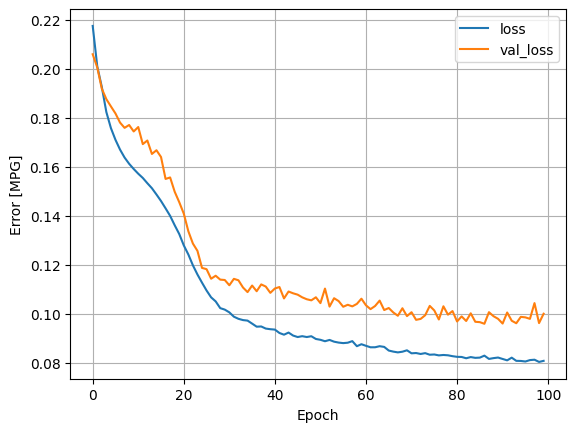

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
#plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)


Plotting Binary Classification Accuracy vs Epochs



Text(0.5, 1.0, 'Multi-task Binary Classification Accuracy vs Epochs')

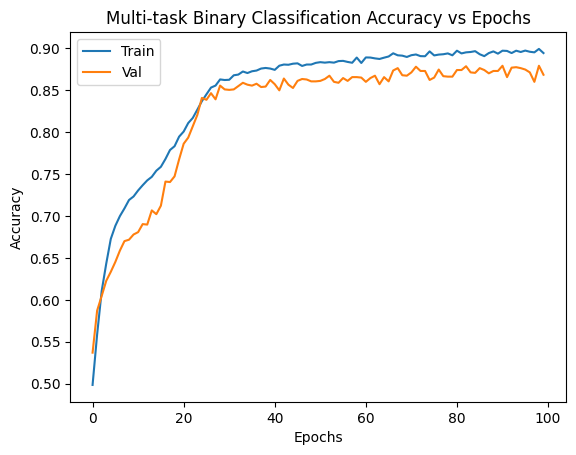

In [ ]:
import matplotlib.pyplot as plt

print(f'\nPlotting Binary Classification Accuracy vs Epochs\n')
plt.plot(range(len(model_history.history['binary_out_accuracy'])), model_history.history['binary_out_accuracy'], label='Train')
plt.plot(range(len(model_history.history['val_binary_out_accuracy'])), model_history.history['val_binary_out_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Multi-task Binary Classification Accuracy vs Epochs")


Plotting Regression MSE vs Epochs



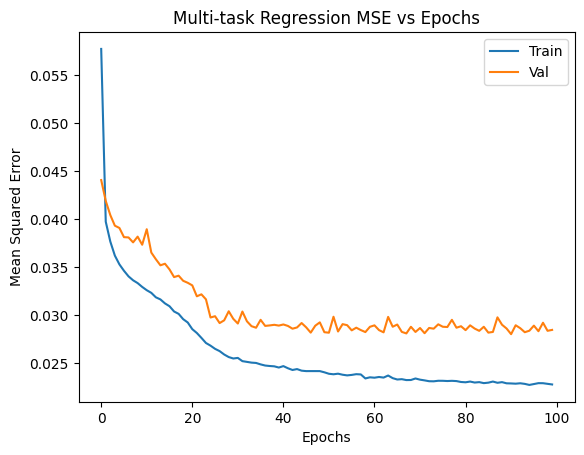

In [ ]:
print(f'\nPlotting Regression MSE vs Epochs\n')
plt.plot(range(len(model_history.history["regression_out_mean_squared_error"])), model_history.history['regression_out_mean_squared_error'], label='Train')
plt.plot(range(len(model_history.history["val_regression_out_mean_squared_error"])), model_history.history['val_regression_out_mean_squared_error'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title("Multi-task Regression MSE vs Epochs")
plt.legend()
plt.show() 

In [ ]:
"""
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Separate the majority and minority classes
majority_class = simplified_dataset[simplified_dataset['hit'] == 0]
minority_class = simplified_dataset[simplified_dataset['hit'] == 1]

print(len(simplified_dataset), len(majority_class), len(minority_class))

# Undersample the majority class to match the number of samples in the minority class
n_samples = len(minority_class)
majority_class_downsampled = resample(majority_class, 
                                      replace=False,
                                      n_samples=n_samples,
                                      random_state=0)

# Combine the downsampled majority class with the minority class
data_downsampled = pd.concat([majority_class_downsampled, minority_class])

# Shuffle the rows of the downsampled dataset
data_downsampled = data_downsampled.sample(frac=1, random_state=42)

train = data_downsampled[data_downsampled.train].drop(['train'], axis=1)
test = data_downsampled[~data_downsampled.train].drop(['train'], axis=1)

print(train)
#X_train, X_test, y_train, y_test = train_test_split(data_downsampled['lyrics'], data_downsampled["hit"], test_size=0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(data_downsampled, data_downsampled[["hit", "popularity"]], test_size=0.2, random_state=0)

#X = data_downsampled.iloc[:,0:14]
#y_bin = data_downsampled.iloc[:,14:15]
#y_pop = data_downsampled.iloc[:,15:16]



X = X_train.iloc[:,0:14]
y_bin = y_train.iloc[:,0:1]
y_pop = y_train.iloc[:,1:2]

X_test_num = X_test.iloc[:,0:14]
y_test_bin = y_test.iloc[:,0:1]
y_test_pop = y_test.iloc[:,1:2]

y_bin = np.asarray(y_bin)
y_pop = np.asarray(y_pop)
X = np.asarray(X)

y_test_bin = np.asarray(y_test_bin)
y_test_pop = np.asarray(y_test_pop)
X = np.asarray(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

test_scaler = StandardScaler()
X_test_num = scaler.fit_transform(X_test_num)


min_max_scaler = preprocessing.MinMaxScaler()
y_pop = min_max_scaler.fit_transform(y_pop)
print(y_pop)

test_min_max_scaler = preprocessing.MinMaxScaler()
y_test_pop = test_min_max_scaler.fit_transform(y_test_pop)

"""

10882 5354 5528


ValueError: ignored